In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Cargamos nuestro archivo CSV previamente ya preparado para su analisis, donde lo cargamos con la libreria pandas y mostramos las primeras 5 filas
df = pd.read_csv('Final.csv')

#Eliminamos la categoria de id de las columnas, esta no es necesaria en general solo es 1 categoria y ya se tiene el nombre
#creamos un df de la correlacion unicamente de los valores numericos
df = df.drop(columns=['ID_CATEGORY'])
dfCorr = df.corr(numeric_only=True)

#De nuestro DF principal nos aseguramos que sea de tipo fecha
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['BRAND'] == 'VANISH']

#Agrupamos por formato y sumamos el Total de Ventas y de Unidades Vendidas, ordenandolo por el Valor de Venta
dfFormatSales = df.groupby(['FORMAT'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].sum().reset_index().sort_values(by='TOTAL_VALUE_SALES', ascending = False)

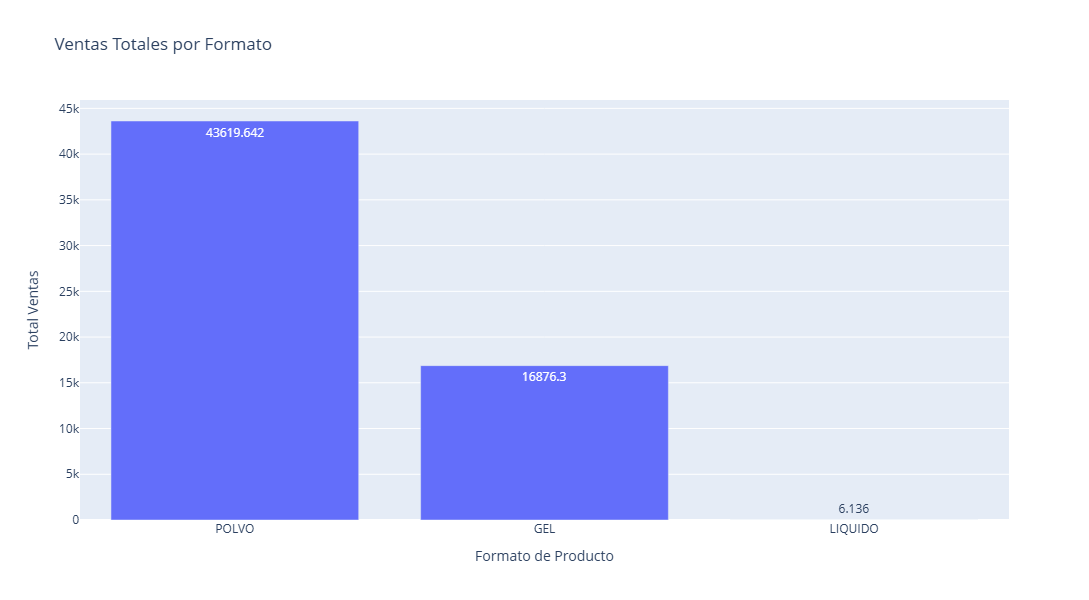

In [4]:
fig = px.bar(
    dfFormatSales,
    x="FORMAT",
    y="TOTAL_VALUE_SALES",
    title="Ventas Totales por Formato",
    text="TOTAL_VALUE_SALES",
    height=600,
    labels={
        "FORMAT": "Formato de Producto",
        "TOTAL_VALUE_SALES": "Total Ventas"
    }
)
fig.show()

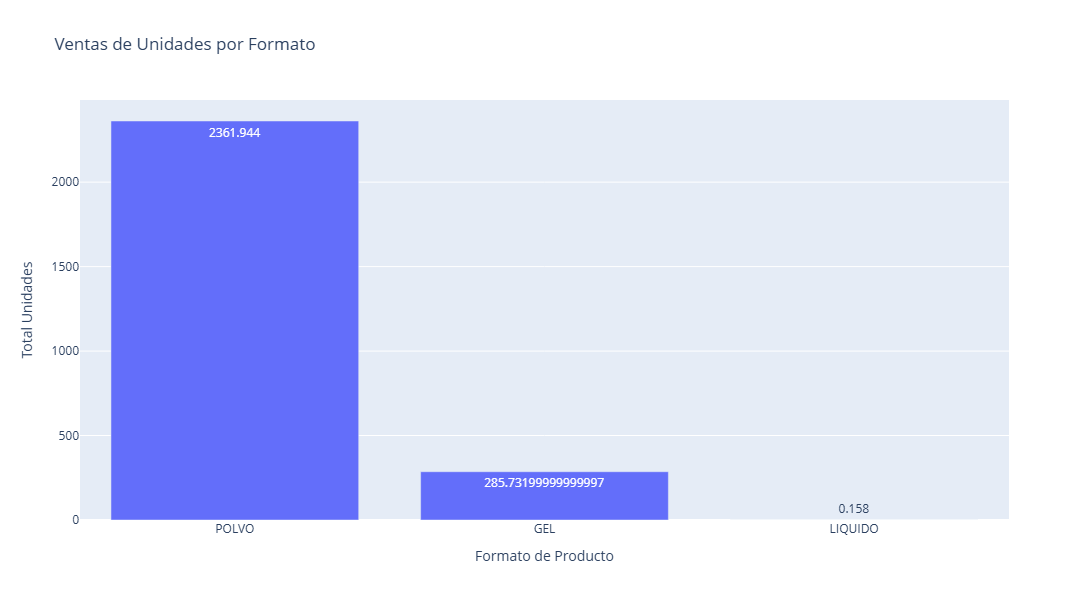

In [5]:
fig = px.bar(
    dfFormatSales.sort_values(by='TOTAL_UNIT_SALES', ascending = False),
    x="FORMAT",
    y="TOTAL_UNIT_SALES",
    text="TOTAL_UNIT_SALES",
    title="Ventas de Unidades por Formato",
    height=600,
    labels={
        "FORMAT": "Formato de Producto",
        "TOTAL_UNIT_SALES": "Total Unidades"
    }
)
fig.show()